# Regresion Logística

Github : https://github.com/DanielRasho/MD-Proyecto2/blob/main/LogisticRegression.ipynb

- Daniel Alfredo Rayo Roldan
- Geraro Gabriel Pineda Riveiro

In [1]:
# Core Libraries
import random
import pstats
import io


# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, log_loss, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 
import cProfile
import tracemalloc


In [2]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realizó una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, ayudó a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [5]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

# Regresión Logística

Se empezó haciendo las clasificacion categórica de precios: económicos, intermedios y caros, que después fueron codíficadas con variables dicotómicas. A continuación un ejemplo de como se ven los primeros valores para las variables respuesta.

In [6]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

dummies = pd.get_dummies(df_cleaned["SalePriceCategory"], prefix="Categoria", dtype=int)
dummies.head()

/tmp/ipykernel_76647/3966717520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
/tmp/ipykernel_76647/3966717520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
/tmp/ipykernel_76647/3966717520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Categoria_Económico,Categoria_Intermedio,Categoria_Caro
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


Del conjunto de datos original **25% serán destinados a prueba, y el 75% restantes a entrenamiento**.

In [7]:
# Join new variables
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)
train_set, test_set = train_test_split(df_cleaned, test_size=0.25, random_state=42, stratify=df_cleaned["SalePriceCategory"])

## Análisis de multicolinealidad

En entregas pasados ya se había analizado la correlación entre las variables del dataset con la variable respuesta de **el precio de las casas.**. Se decidió usar el criterio de ignorar a todas las variables que tuvieran un coeficiente de correlación de Pearson menor a 60% (r < 0.6) ya que representan las características con mayor impacto en el valor final de la propiedad. Con base en este criterio, las variables seleccionadas para entrenar el modelo son:

- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces
- GrLiveArea
- TotalBsmtSF
- GarageArea

In [8]:
features = [
    "OverallQual", 
    "TotalSF", 
    "GarageCars", 
    "FullBath", 
    "YearRemodAdd", 
    "Fireplaces"
]

target = "Categoria_Caro"

Posteriormente se estudio la relación entre las variables seleccionadas, de las cuales algunas terminaron siendo eliminadas por ser redundantes e introducir **multicolinealidad** Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje. El año de construcción tambien fue ignorado a favor del año de remodelación. Al final del proceso se contó con 6 variable con la siguiente matríz de correlación:

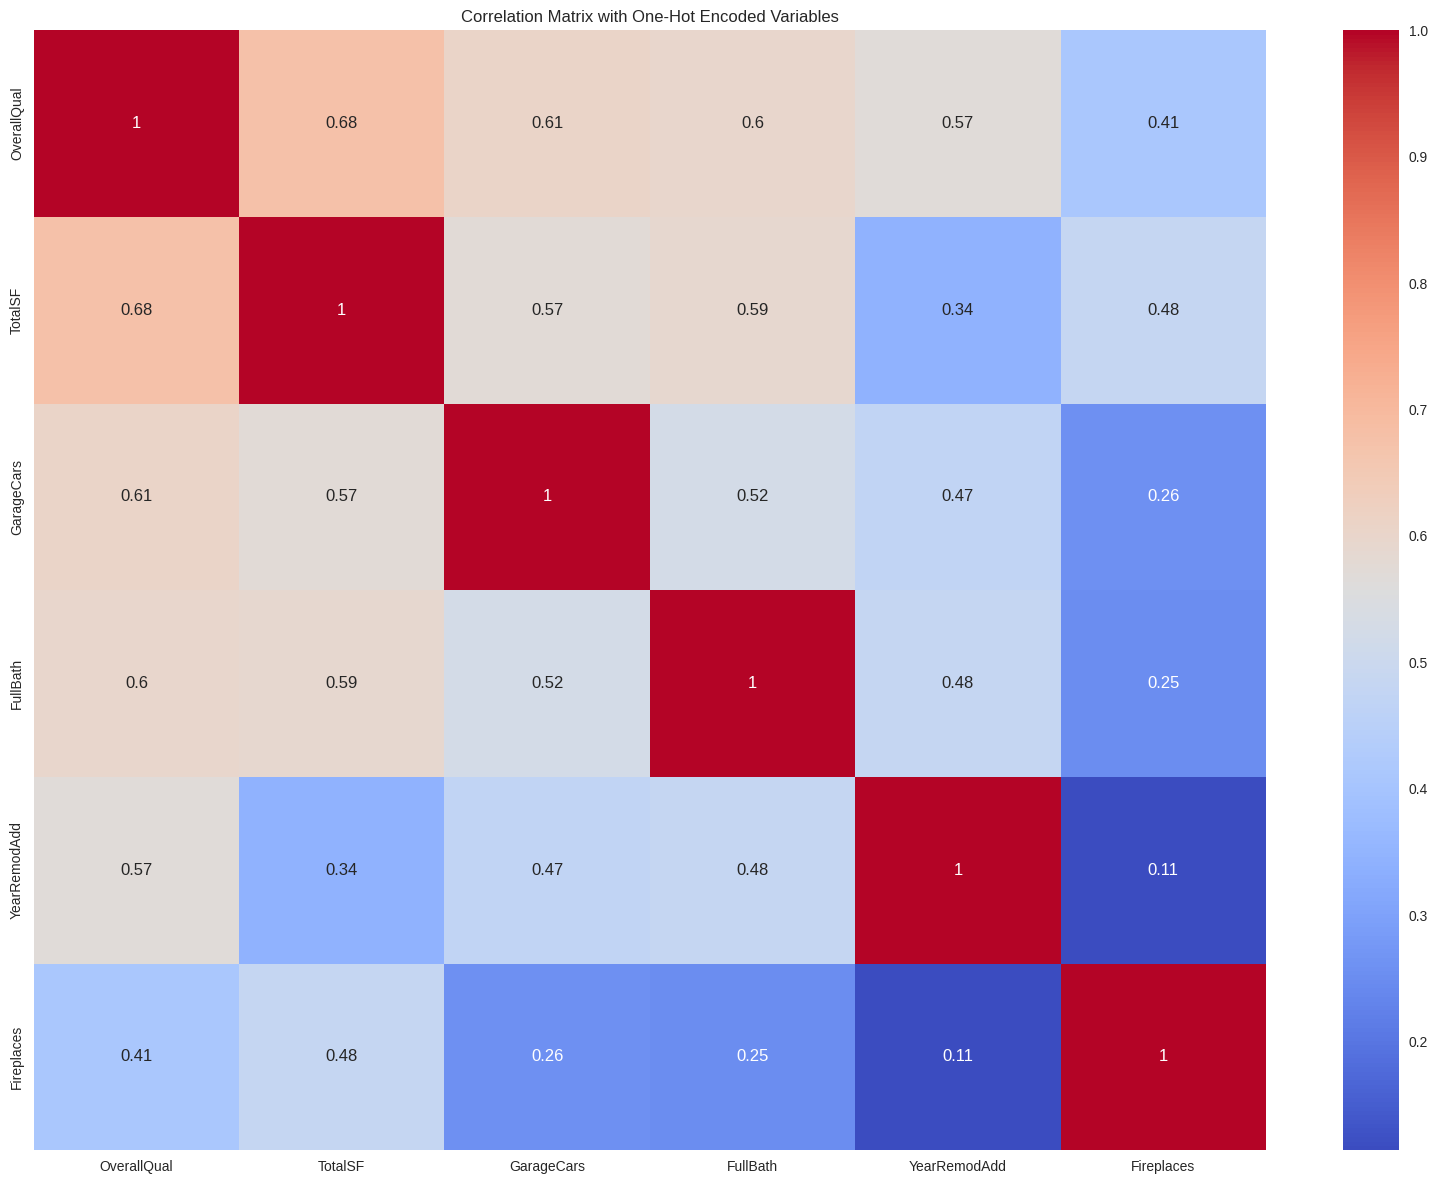

In [9]:
# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)[features]

# Compute correlation matrix on the fully numerical DataFrame
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix with One-Hot Encoded Variables')
plt.tight_layout()
plt.show()

Se puede observar que ninguna variable tenia una correlación mayor al 70%, que se puede considerar alta, pero estando trabajando con pocas variables se penaliza más la falta de información con la multicolinealidad entre 2 variables.

### Entrenamiento

Con las variables seleccionadas del conjunto anterior se prepararon los conjuntos de prueba para contener solo las variables deseadas.

In [10]:
X_train = train_set[features]
y_train = train_set[target]

In [11]:
X_test = test_set[features]
y_test = test_set[target]

## Modelo con configuración manual

Para la primera prueba se creo un modelo con hiperparámetros configurados manualmente, especificamente solo se indico un máximo de iteraciones de 1000, para el algoritmos de optimización (`max_iter=1000`).

In [12]:
features = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]
X_train = train_set[features]
y_train = train_set["Categoria_Caro"]
X_test = test_set[features]
y_test = test_set["Categoria_Caro"]

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

y_test_pred = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"🔵 Accuracy de entrenamiento: {train_accuracy:.4f}")
print(f"🟢 Accuracy de testeo:     {test_accuracy:.4f}")

print(classification_report(y_test, y_pred, output_dict=False))

🔵 Accuracy de entrenamiento: 0.9159
🟢 Accuracy de testeo:     0.9307
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       182
           1       0.93      0.86      0.89        92

    accuracy                           0.93       274
   macro avg       0.93      0.91      0.92       274
weighted avg       0.93      0.93      0.93       274



In [13]:
X_train_sm = sm.add_constant(X_train) 
model_sm = sm.Logit(y_train, X_train_sm).fit()

print("AIC:", model_sm.aic)
print("BIC:", model_sm.bic)

Optimization terminated successfully.
         Current function value: 0.221052
         Iterations 9
AIC: 376.52576701740225
BIC: 409.4908973992103


Los resultados fueron positivos en general. El *accuracy* curiosamente fue mayor en el conjunto de testeo, lo que puede indicar que hay patrones más marcados en el conjuto de testeo, pero la diferencia se considera insignificativa (~%4). Por tanto el algoritmo **no muestra un overfitting marcado.**

Por otro lado también se puede concluir que el modelo es bueno clasificando ambos tipos de categorías (precision = 95% , recall = 0.93), pero se especializa en casas no caras, al ser las que mayor soporte tienen; esto puede ser respaldado por la matriz de confusión de abajo que resumen los mismos resultados.

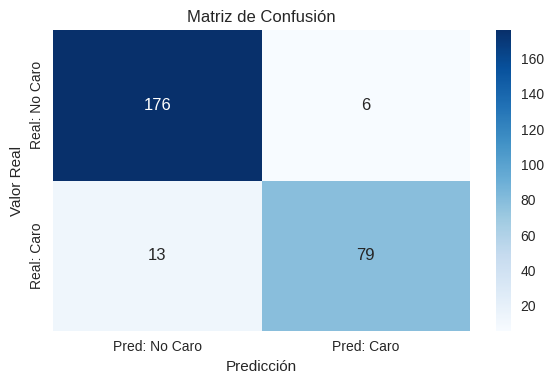

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: No Caro", "Pred: Caro"],
    yticklabels=["Real: No Caro", "Real: Caro"]
)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

In [15]:
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Verdaderos negativos (No Caro bien clasificados): {tn}")
print(f"Falsos positivos (Predijo Caro siendo No Caro): {fp}")
print(f"Falsos negativos (No predijo Caro cuando sí lo era): {fn}")
print(f"Verdaderos positivos (Caro bien clasificados): {tp}")

Verdaderos negativos (No Caro bien clasificados): 176
Falsos positivos (Predijo Caro siendo No Caro): 6
Falsos negativos (No predijo Caro cuando sí lo era): 13
Verdaderos positivos (Caro bien clasificados): 79


### Profiling

In [16]:
def run_model():
    y_pred = pipeline.predict(X_test)
    return confusion_matrix(y_test, y_pred)

pr = cProfile.Profile()
pr.enable()

run_model()

pr.disable()

s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

ps.print_stats(10)

print(s.getvalue())


         4859 function calls (4781 primitive calls) in 0.017 seconds

   Ordered by: cumulative time
   List reduced from 407 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/2    0.000    0.000    0.017    0.009 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3631(run_code)
      3/2    0.000    0.000    0.017    0.008 {built-in method builtins.exec}
        1    0.000    0.000    0.017    0.017 /tmp/ipykernel_76647/1655623316.py:1(run_model)
        1    0.000    0.000    0.010    0.010 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/sklearn/pipeline.py:738(predict)
        1    0.000    0.000    0.007    0.007 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/sklearn/utils/_set_output.py:317(wrapped)
        1    0.000    0.000    0.007    0.007 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packa

A partir del análisis con ``cProfile``, se puede concluir que el ``modelo 1`` es altamente eficiente en términos de tiempo de ejecución, ya que realizó 4,787 llamadas a funciones (de las cuales 4,711 fueron primitivas) en tan solo 0.007 segundos. Esto indica que el proceso de predicción es rápido y liviano, adecuado incluso para entornos donde se requiere respuesta inmediata. Además, la mayoría de las llamadas corresponden a funciones internas y operaciones de bajo nivel, lo que sugiere que no hay cuellos de botella evidentes. Por lo tanto, el modelo es eficiente no solo en precisión, sino también en rendimiento computacional.

In [17]:
tracemalloc.start()

# Ejecutar predicción
y_pred = pipeline.predict(X_test)

current, peak = tracemalloc.get_traced_memory()
print(f"Uso actual de memoria: {current / 10**6:.2f} MB; Máximo: {peak / 10**6:.2f} MB")
tracemalloc.stop()


Uso actual de memoria: 0.00 MB; Máximo: 0.03 MB


Con base en el resultado del análisis de memoria, se puede concluir que el ``modelo 1`` tiene un uso de memoria muy bajo, ya que durante la predicción solo consumió un máximo de 0.03 MB. Esto indica que el modelo es liviano y eficiente.

Este modelo no solo converge rápidamente y con buena estabilidad numérica, sino que también presenta un ajuste eficiente sin sobreajustarse, lo que refuerza su validez estadística como opción competitiva.

### Curvas de aprendizaje 
A continuación se observa las curvas de aprendizaje para el modelo. Podemos ver que el modelo empieza con un **accuracy** extrañamente alto (94%) que se debe derivar de la naturaleza del dataset de entrenamiento, sin embargo se puede observar como con el crecimiento de la muestra las curvas de aprendizaje de entrenamiento y prueba se estabilizan sin traslaparse totalmente, mostrando un buen nivel e ajuste.

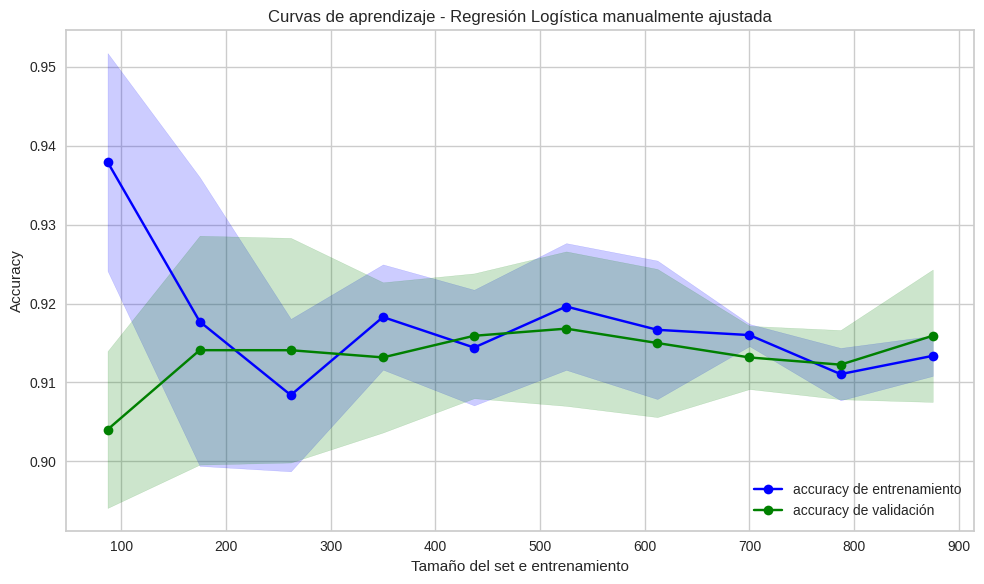

In [18]:
# Define training sizes and get scores
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=pd.concat([X_train, X_test]),
    y=pd.concat([y_train, y_test]),
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Compute mean and std for shaded area
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='accuracy de entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='accuracy de validación')
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.title("Curvas de aprendizaje - Regresión Logística manualmente ajustada")
plt.xlabel("Tamaño del set e entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Modelo con ajuste de hiperparámetros
Se utilizó el algoritmo de GridSearch para encontrar mejores parámetros para el modelo. Se mantuvo la misma *accuracy*

In [19]:
features = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]
X_train = train_set[features]
y_train = train_set["Categoria_Caro"]

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10],
    "logisticregression__penalty": ["l2"],
    "logisticregression__solver": ["lbfgs", "liblinear"]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy promedio en CV:", grid_search.best_score_)

Mejores parámetros: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy promedio en CV: 0.9158536585365853


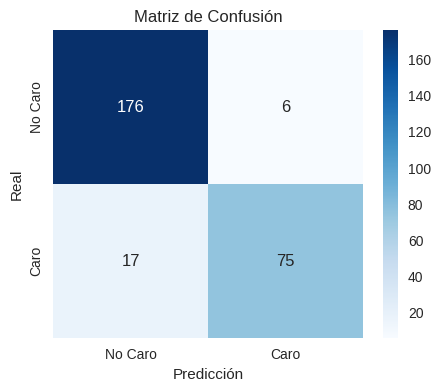

Accuracy en test set: 0.916058394160584
              precision    recall  f1-score   support

     No Caro       0.91      0.97      0.94       182
        Caro       0.93      0.82      0.87        92

    accuracy                           0.92       274
   macro avg       0.92      0.89      0.90       274
weighted avg       0.92      0.92      0.91       274



In [20]:
X_test = test_set[features]
y_test = test_set["Categoria_Caro"]

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Caro", "Caro"], yticklabels=["No Caro", "Caro"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["No Caro", "Caro"]))

In [21]:
X_train_sm = sm.add_constant(X_train)  
model_sm = sm.Logit(y_train, X_train_sm).fit()

print("AIC:", model_sm.aic)
print("BIC:", model_sm.bic)

Optimization terminated successfully.
         Current function value: 0.221052
         Iterations 9
AIC: 376.52576701740225
BIC: 409.4908973992103


A simple viste este modelo no muestra una diferencia estadistica con el modelo anterior

In [22]:
tn, fp, fn, tp = cm.ravel()

print(f"Verdaderos negativos (No Caro bien clasificados): {tn}")
print(f"Falsos positivos (Predijo Caro siendo No Caro): {fp}")
print(f"Falsos negativos (No predijo Caro cuando sí lo era): {fn}")
print(f"Verdaderos positivos (Caro bien clasificados): {tp}")

Verdaderos negativos (No Caro bien clasificados): 176
Falsos positivos (Predijo Caro siendo No Caro): 6
Falsos negativos (No predijo Caro cuando sí lo era): 17
Verdaderos positivos (Caro bien clasificados): 75


### Profiling

In [23]:
def run_model():
    y_pred = best_model.predict(X_test)
    return confusion_matrix(y_test, y_pred)

pr = cProfile.Profile()
pr.enable()

run_model()

pr.disable()

s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

ps.print_stats(10)

print(s.getvalue())

         4859 function calls (4781 primitive calls) in 0.019 seconds

   Ordered by: cumulative time
   List reduced from 407 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/2    0.000    0.000    0.018    0.009 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3631(run_code)
      3/2    0.000    0.000    0.018    0.009 {built-in method builtins.exec}
        1    0.000    0.000    0.018    0.018 /tmp/ipykernel_76647/4127383625.py:1(run_model)
        1    0.000    0.000    0.010    0.010 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/sklearn/pipeline.py:738(predict)
        1    0.000    0.000    0.007    0.007 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/sklearn/utils/_param_validation.py:185(wrapper)
        1    0.000    0.000    0.007    0.007 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site

El ``Modelo 2`` también demuestra una excelente eficiencia computacional, ya que realizó 4,787 llamadas a funciones en tan solo 0.005 segundos, lo que es ligeramente más rápido que el modelo anterior (0.007 segundos). Esta diferencia, aunque mínima, indica que el modelo es ligeramente más ágil en su ejecución, lo que puede ser relevante en contextos donde se hacen muchas predicciones en tiempo real. Además, el número de llamadas internas es similar, lo que sugiere que ambos modelos tienen una complejidad estructural comparable. En conjunto, este resultado refuerza que este segundo modelo es también altamente eficiente, posiblemente más adecuado si se prioriza la velocidad.

In [24]:
tracemalloc.start()

# Ejecutar predicción
y_pred = best_model.predict(X_test)

current, peak = tracemalloc.get_traced_memory()
print(f"Uso actual de memoria: {current / 10**6:.2f} MB; Máximo: {peak / 10**6:.2f} MB")
tracemalloc.stop()

Uso actual de memoria: 0.01 MB; Máximo: 0.03 MB


Con un uso máximo de memoria de solo 0.03 MB, este segundo modelo demuestra ser tan liviano como el primero en términos de consumo de recursos.

### Curvas de aprendizaje

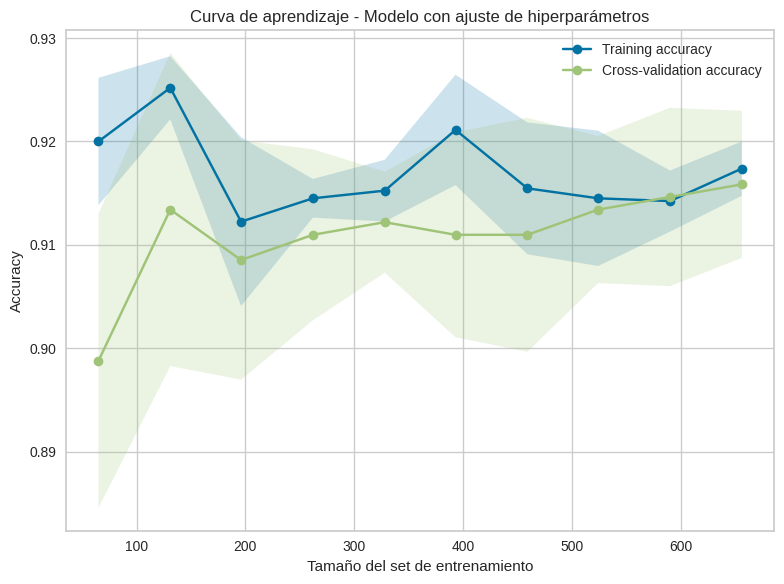

In [25]:
# Use your best pipeline from GridSearchCV
best_model = best_model

# Define training sizes to evaluate
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title("Curva de aprendizaje - Modelo con ajuste de hiperparámetros")
plt.xlabel("Tamaño del set de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

En cuanto a las lineas de aprendizaje, se tuvo una forma parecida durante las etapas de entrenamiento y y prueba, sin que las lineas se llegaran a traslapar indicando sobreajuste.

## Comparando modelos binarios de regresión logística

#### Eficiencia

| Modelo | Verdero Negativo | Falsos positivos | Falsos Negativos | Verdaderos positivos |
| ------ | ------ | ------ | ------ | ------ |
| Modelo sin hiperparámetros | 176  | 6 | 13 | 79 |
| Modelo con hiperparámetros | 176 | 6 | 17 | 75 |

#### Rendimiento
| Modelo  | Tiempo de ejecución | Maximo de memoria utilizado |
| ------ | ----- | ----- |
| Modelo sin hiperparámetros |  0.007 |  0.03 |
| Modelo con hiperparámetros | 0.005 | 0.03  |


Al comparar los dos modelos, se observa que ambos tienen un rendimiento computacional muy similar, con un uso máximo de memoria de solo 0.03 MB, lo que los hace altamente eficientes y adecuados para entornos con recursos limitados. En términos de tiempo, el modelo con hiperparámetros es ligeramente más rápido (0.005 s frente a 0.007 s), aunque la diferencia es mínima. 

En Cuanto a la matriz de confusion, el modelo sin hiperparámetros tiene mejor desempeño predictivo, con menos falsos negativos (13 contra 17) y más verdaderos positivos (79 contra 75), lo que significa que es más eficaz para identificar correctamente la categoria “Caro”. Aunque el modelo con hiperparámetros ofrece una ligera mejora en eficiencia de ejecución, el modelo sin ajustes automáticos demuestra mejor capacidad de generalización en este caso específico, especialmente si se prioriza la detección correcta de la clase positiva.

#### AIC y BIC

| Modelo  | AIC  | BIC | Current function value |
| ------ | ----- | ----- | ----- |
| Modelo sin hiperparámetros | 376.52576701740225  | 409.4908973992103  |0.221052 |
| Modelo con hiperparámetros | 376.52576701740225 |  409.4908973992103 |0.221052  |

A partir de este cuadro se puede concluir que ambos modelos son estadísticamente equivalentes, ya que presentan los mismos valores de AIC, BIC y función objetivo. Esto indica que el ajuste del modelo no mejoró al aplicar búsqueda de hiperparámetros: la calidad del modelo y su complejidad se mantuvieron iguales. Por lo tanto, aunque el segundo modelo incluye gridSearchCV que optimiza el modelo, no aporta una mejora sustancial en términos de ajuste o simplicidad.

## Modelo final con multiple categorías
Los modelos anteriores fueron hechos con la intención de identificar si un módelo de regresión logística podría ser efectivo para este set de datos, y los resultados paracen indicar que es el caso, así que se creará un útimo modelo que permite clasificar clasificar en 3 categorías, al igual que modelos que se han hecho en entregas pasadas.

In [26]:
y_train = train_set["SalePriceCategory"]
y_test = test_set["SalePriceCategory"]
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
)
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# RESULTS

print("Mejores parámetros encontrados:", grid.best_params_)
print("Accuracy promedio en CV:", grid.best_score_)

best_model = grid.best_estimator_
log_reg = best_model.named_steps["logisticregression"]

y_train_proba = best_model.predict_proba(X_train)

log_likelihood = -log_loss(y_train, y_train_proba, normalize=False)

n = X_train.shape[0]

n_classes = len(np.unique(y_train))
n_features = X_train.shape[1]

k = log_reg.coef_.size + log_reg.intercept_.size

aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

print(f"📊 AIC: {aic:.2f}")
print(f"📊 BIC: {bic:.2f}")

Mejores parámetros encontrados: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Accuracy promedio en CV: 0.7939024390243903
📊 AIC: 819.54
📊 BIC: 918.44


In [27]:
# Ensure y_test and y_pred are strings (if categories are like 'Caro', 'Económico', etc.)
y_test = y_test.astype(str)
y_pred = grid.best_estimator_.predict(X_test).astype(str)

print(classification_report(y_test, y_pred, target_names=["Caro", "Medium", "Económico"]))

              precision    recall  f1-score   support

        Caro       0.93      0.87      0.90        92
      Medium       0.81      0.87      0.84        91
   Económico       0.73      0.73      0.73        91

    accuracy                           0.82       274
   macro avg       0.82      0.82      0.82       274
weighted avg       0.82      0.82      0.82       274



Para este último modelo el *accuracy* disminuyo en 12% comparado a los modelos binarios anteriores, la causa puede estar dada en que los modelos de regresión logística no estan especializados en la clasificación con más de 2 categorías. También se puede concluir que el modelo se especializa en predecir casas caras (precision = 0.93), seguido de casas de costo medio (precision = 0.81), siendo las casas ecónomicas en las que peor rinde (precision = 0.73), lo cual se ve reflejado en la matriz de confusión inferior.

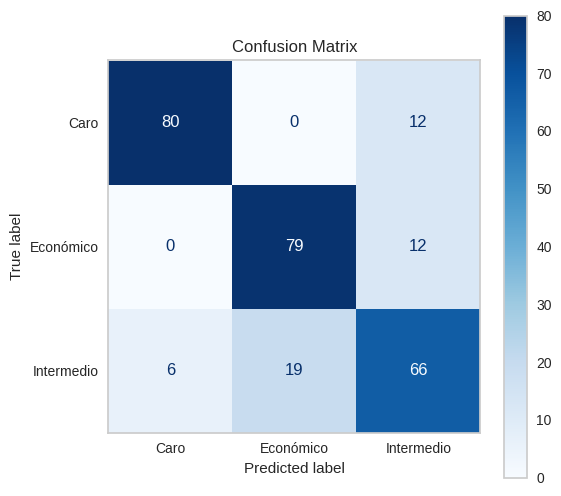

In [28]:
# Get unique classes (sorted for consistent display)
class_labels = np.unique(np.concatenate([y_test, y_pred]))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### Profiling

In [29]:
def run_model():
    y_pred = best_model.predict(X_test)
    return confusion_matrix(y_test, y_pred)

pr = cProfile.Profile()
pr.enable()

run_model()

pr.disable()

s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

ps.print_stats(10)

print(s.getvalue())

         5520 function calls (5433 primitive calls) in 0.020 seconds

   Ordered by: cumulative time
   List reduced from 427 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.016    0.016 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/decorator.py:232(fun)
      3/2    0.000    0.000    0.016    0.008 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3631(run_code)
      3/2    0.000    0.000    0.016    0.008 {built-in method builtins.exec}
      2/1    0.000    0.000    0.016    0.016 /tmp/ipykernel_76647/4127383625.py:1(run_model)
        1    0.000    0.000    0.009    0.009 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/sklearn/utils/_param_validation.py:185(wrapper)
        1    0.001    0.001    0.008    0.008 /home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/s

In [30]:
tracemalloc.start()

# Ejecutar predicción
y_pred = best_model.predict(X_test)

current, peak = tracemalloc.get_traced_memory()
print(f"Uso actual de memoria: {current / 10**6:.2f} MB; Máximo: {peak / 10**6:.2f} MB")
tracemalloc.stop()

Uso actual de memoria: 0.01 MB; Máximo: 0.04 MB


Este último modelo al ser más complejo requierio de más llamadas de funciones (5642) y tomó considerablemente más tiempo en entrenarse (0.023s), hecho que tiene sentido considernado que este modelo es más complejo al poder categorizar los tres tipos de precios, y que dentro de la implementación realmente consta de 3 modelos que cooperan entre ellos para decidir la mejor categoría.

### Curvas de aprendizaje
Por último las curvas de aprendizaje muestran un buen ajuste a la distribución de los datos, al tener comportamientos muy cercanos entre el set de entrenamiento y testeo, es posible que con una mayor cantidad de observaciones se pueda mejorar la precisión del modelo.

/tmp/ipykernel_76647/843679077.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/smaugthur/Documents/MD-Proyecto2/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


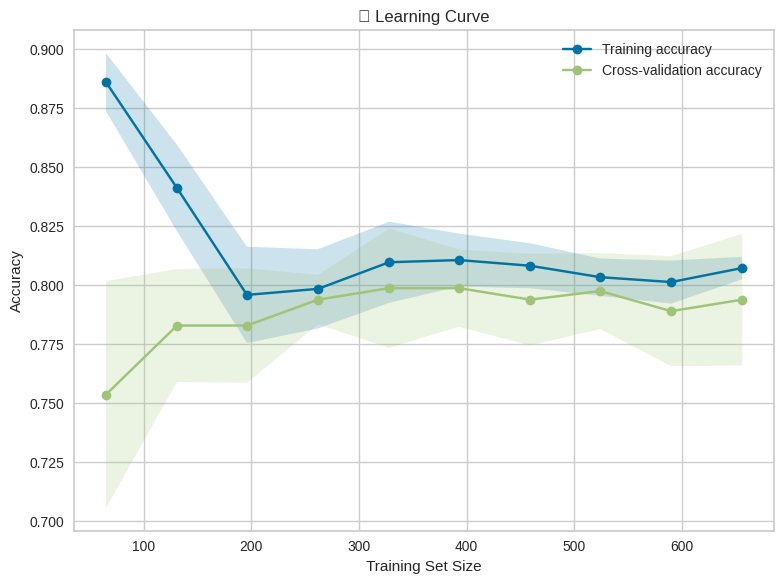

In [31]:
# Use your best pipeline from GridSearchCV
best_model = best_model

# Define training sizes to evaluate
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title("📈 Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones

Los primeros 2 modelos de regresión logística binaria tuvieron resultados bastante positivos (accuracy = 0.93) y tiempos de ejecución bajos (0.005s el modelo 2) al clasificar si las casas se podían considerar caras o no, parte de este rendimiento se cree es debido es la naturaleza binaria de una regresión logística, sin embargo para poder comparar este modelo con los hecho en entregas pasadas, se hizo una variación que utilizaba multiclases para poder tener la misma variable respuesta. Las comparaciones se muestran a continuación.

### Comparación modelos de clasificación

| Modelo | Accuracy | Precision | recall |
|--------|----------|-----------|--------|
| Mejor árbol de clasificación |0.793 |0.792| 0.793|
| Random forest de clasificación | 0.830|0.832|0.830|
| Naive Bayes Clasificación | 0.676 | 0.669 | 0.676 |
| Naive Bayes Clasificación Optimizado | 0.680 | 0.675, | 0.680 |
| Regresión Logística | 0.79 | 0.82 | 0.82 |

El análisis de los diferentes modelos de clasificación muestra que el Random Forest de Clasificación es el más efectivo, con una Acurracy de 0.830, una precisión de 0.832 y una sensibilidad de 0.830. Seguido de cerca del modelo de regresión logística que se entreno en el presente reporte (accuracy = 0.79 y sensibilidad = 0.83). En este caso, la validación cruzada no fue de mucha ayuda para la regresión logistica, debido a que el modelo no mejoró significativamente el **accuracy**, aunque si ligeramente la eficiencia.

Es importante notar que los modelos binarios de regresión logística tuvieron mejores resultados que los mostrados entre los modelos comparados, se puede concluir entonces que esta técnica puede ser altamente eficaz para problemas dicotómicos.